# Let's Finish these calculations

In [1]:
# Homemade models
from modules import week8 as w8
from modules import week5 as w5
from modules import week9 as w9
from modules import week10 as w10
from modules import misc

# Calculations and data stuff
import numpy as np
import xarray as xr
from pyproj import Proj, transform

# plotting
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs

%load_ext autoreload
%autoreload 2

In [19]:
# Loading data from file
SIC, LIC = w8.load_ice_data()
SIC = SIC.compute()
LIC = LIC.compute()
temperature = w8.load_temp_data().compute()

# Landmask
landmask = w8.load_landmask()
landmask = landmask >= .5

# New variables
cc_700 = xr.open_dataarray('processed_data/cc_700.nc')
cc_500 = xr.open_dataarray('processed_data/cc_500.nc')
cc_200 = xr.open_dataarray('processed_data/cc_200.nc')
o3_700 = xr.open_dataarray('processed_data/o3_700.nc')
o3_500 = xr.open_dataarray('processed_data/o3_500.nc')
o3_200 = xr.open_dataarray('processed_data/o3_200.nc')
ssrd = xr.open_dataarray('processed_data/ssrd.nc')
ssru = xr.open_dataarray('processed_data/ssru.nc')
ssr = xr.open_dataarray('processed_data/ssr.nc')

variables = [SIC, LIC, temperature, landmask, cc_700, cc_500, cc_200, o3_700, o3_500, o3_200, ssrd, ssru, ssr]

misc.print_heading("Data Loaded")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:02<00:00, 64.67it/s]


------------------------------------------------------------------------------
                                 Data Loaded                                 
------------------------------------------------------------------------------


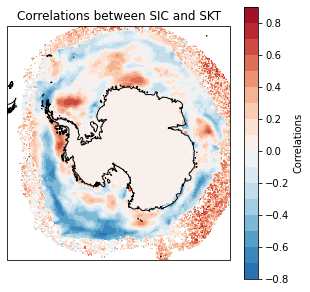

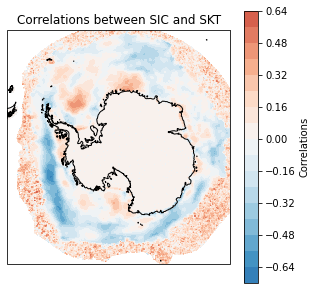

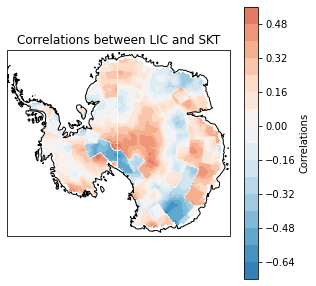

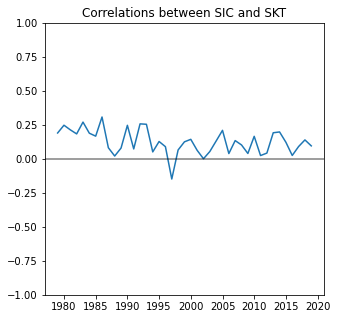

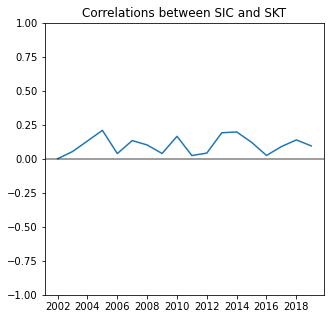

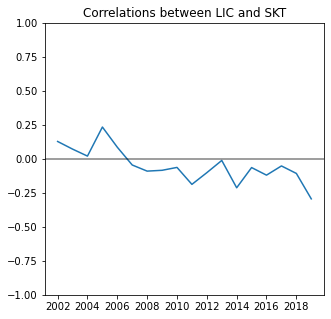

AttributeError: 'DataArray' object has no attribute 'skt'

In [33]:
for x in [SIC, LIC, temperature, landmask, cc_700, cc_500, cc_200, o3_700, o3_500, o3_200, ssrd, ssru, ssr]:
    if 'time' in x.coords:
        x = (
            x.pipe(w5.yearly_average)
            )
w8.correlation_plots(w5.yearly_average(SIC), w5.yearly_average(LIC), w5.yearly_average(cc_200), landmask)